This is a simple notebook that has some plots of the particle trajectories in a simulation. 

In [1]:
path = "/notebooks/ml-sims/data/nanoparticle/"
#have to load in the whole array from the start anyway
import h5py
import numpy as np
from pylearn2.utils import serial
totParticles = 262144

nParticles = 5

trainingFrac = .8
validFrac= .1

#sl = np.s_[:nParticles, :]
sl = np.s_[int(totParticles*(trainingFrac+validFrac)):int(totParticles*(trainingFrac+validFrac))+nParticles, :]

X = np.zeros((100, nParticles*6))
y = np.zeros((100, nParticles*3))

absMinVel, absMaxVel = 0,0
maxCoord= 10000 #particles in a 0-10000 cube

In [2]:
def getFilename(i):
    base = path+'snapshot_'
    if i<10:
        out= base+'00%d.hdf5'%i
    elif i<100:
        out= base+'0%d.hdf5'%i
    else:
        out= base+'%d.hdf5'%i
    return serial.preprocess(out)

In [3]:
for i in xrange(101):
    fname = getFilename(i)
    f = h5py.File(fname, 'r')
    ids = f['PartType1']['ParticleIDs'][()]
    sorter = ids.argsort()

    coords = f['PartType1']['Coordinates'][()]
    coords = coords[sorter]#sort by ids

    #normalize
    #coordinates are all >=0, so just divide by max
    #coords/=maxCoord

    #from matplotlib import pyplot as plt
    #plt.scatter(coords[0, 0], coords[0,1], c = colors[i%len(colors)])

    coords = coords[sl]

    if i!=0:
        y[i-1,:] = coords.flatten()

    if i!=100:
        vels = f['PartType1']['Velocities'][()]
        vels = vels[sorter]

        minVel, maxVel = vels.min(), vels.max()
        if minVel < absMinVel:
            absMinVel = minVel

        if maxVel > absMaxVel:
            absMaxVel = maxVel

        vels = vels[sl]
        data = np.concatenate((coords, vels), axis = 1).flatten()

        X[i,:] = data
        del data

    del coords
    f.close()

In [4]:
#normalize the velocity columns
#for n in xrange(nParticles):
#    for col in xrange(3):
#        X[:, n*6+3+col] = (X[:, n*6+3+col])/max(abs(absMinVel), abs(absMaxVel))

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

8439.17089844 6160.12207031
-38.5701599121 21.9826869965


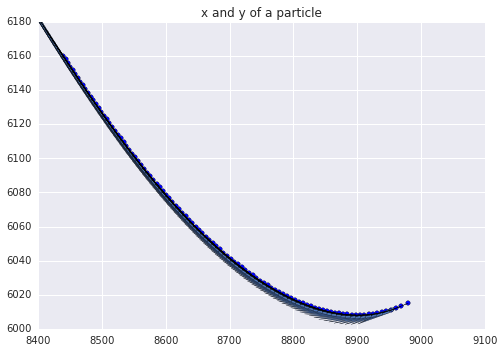

In [6]:
pNo = 0
plt.title('x and y of a particle')
plt.scatter(X[:,pNo*6+0], X[:,pNo*6+1])
for i in xrange(100):
    plt.arrow(X[i,pNo*6+0],X[i,pNo*6+1],X[i,pNo*6+3],X[i,pNo*6+4], head_width = 2, head_length = 50)

print X[i,0],X[i,1]
print X[i,3],X[i,4]
plt.show()

In [7]:
path = '/home/mclaughlin6464/GitRepos/pylearn2/pylearn2/myStuff/'
names = ['train_err', 'valid_err', 'test_err']
colors = ['b', 'g', 'r']
errs = {}
for c, name in zip(colors,names):
    errs[name] = np.loadtxt(path+name, delimiter = ',')
    
    plt.plot(errs[name], color = c, label = name)
    
plt.title('1000 Particles and 1000 Hidden Units')
plt.legend()
plt.show()

IOError: [Errno 2] No such file or directory: '/home/mclaughlin6464/GitRepos/pylearn2/pylearn2/myStuff/train_err'